<a href="https://colab.research.google.com/github/bootstrap666/sintetizadordigital/blob/main/Sintetizador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio # Utilizada para emitir formas de onda pelo dispositivo de áudio padrão
import math # Truncamento para inteiros

In [ ]:
fs = 44100     # Frequência de amostragem
f = 440        # Frequência do tom emitido. Deve ser inferior a fs/2.0 
T = 1.5        # Duração do tom 

omega0 = 2.0*np.pi*f/fs

# Coeficientes do filtro
a = np.array([1, -2.0*np.cos(omega0),  1]) # denominador
b = np.array([0, np.sin(omega0),  -np.sin(omega0)]) # numerador

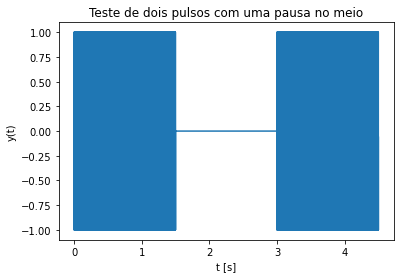

In [ ]:
# geração de um tom de frequência f com T segundos, uma pausa de T segundos e 
# um tom de frequência f de T segundos
x = np.concatenate((np.ones(math.floor(T*fs)), np.zeros(math.floor(T*fs)), np.ones(math.floor(T*fs))))

t = np.arange(0,3*T,1/fs)

y = signal.lfilter(b,a,x)

plt.title('Teste de dois pulsos com uma pausa no meio')
plt.xlabel('t [s]')
plt.ylabel('y(t)')
plt.plot(t,y,Label='y(t)')
plt.show()

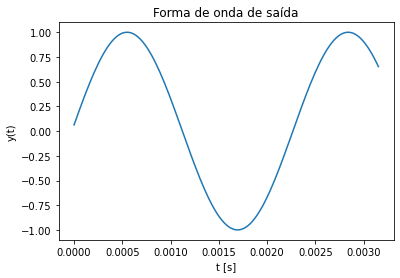

In [ ]:
# "zoom" das 140 primeiras amostras para verificar a forma de onda senoidal
N = 140
plt.title('Forma de onda de saída')
plt.xlabel('t [s]')
plt.ylabel('y(t)')

plt.plot(np.linspace(0, (N-1)/fs, num=N-1), y[1:N])
plt.show()
# Emite o sinal de saída produzido pelo dispositivo de áudio padrão
Audio(y,rate=fs)

In [ ]:
# Produção de dó ré mi ...
fdo = 220*np.power(2.0,3.0/12.0) 
fnotas = fdo*np.array([1,np.power(2.0,2.0/12.0),np.power(2,4.0/12.0),np.power(2.0,5.0/12.0),np.power(2.0,7.0/12.0),np.power(2.0,9.0/12.0), np.power(2.0,11.0/12.0), 2.0])
T = 0.5
x = np.ones(math.floor(T*fs))
notas = []

for f in fnotas:
  a = np.array([1, -2.0*np.cos(2.0*np.pi*f/fs),  1])
  b = np.array([0, np.sin(2.0*np.pi*f/fs),  -np.sin(2.0*np.pi*f/fs)])
  y = signal.lfilter(b,a,x)
  notas = np.concatenate ((notas, y))
Audio(notas,rate=fs)


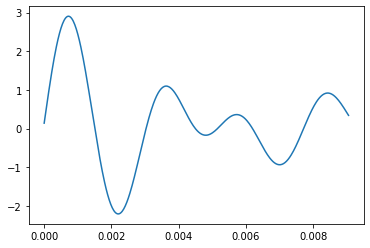

In [ ]:
# Produção de 2 segundos de um acorde dó maior
T = 2
N = 400

fdo = 220*np.power(2.0,3.0/12.0) 

acorde = fdo*np.array([1,np.power(2.0,4.0/12.0),np.power(2.0,7.0/12.0)])

x = np.ones(math.floor(T*fs))
cmaj = np.zeros(math.floor(T*fs))

for nota in acorde:
  a = ([1, -2.0*np.cos(2.0*np.pi*nota/fs),  1])
  b = ([0, np.sin(2.0*np.pi*nota/fs),  -np.sin(2.0*np.pi*nota/fs)])
  cmaj = cmaj + signal.lfilter(b,a,x)

plt.plot(np.linspace(0, (N-1)/fs, num=N-1), cmaj[1:N])
plt.show()

Audio(cmaj,rate=fs)
